In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt
%matplotlib inline 
import plotly as plt

In [3]:
df = pd.read_csv('CardioGoodFitness (1).csv')


In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


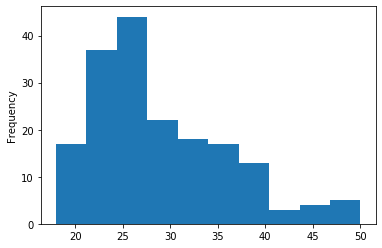

In [5]:
df['Age'].plot(kind='hist')

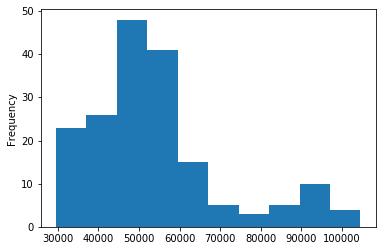

In [6]:
df['Income'].plot(kind='hist')

In [8]:
df.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
8,TM195,21,Male,15,Single,5,4,35247,141
142,TM798,22,Male,18,Single,4,5,48556,200
116,TM498,31,Female,16,Partnered,2,3,51165,64
50,TM195,29,Male,18,Partnered,3,3,68220,85
167,TM798,30,Female,16,Partnered,6,5,90886,280


In [5]:
df.groupby('Product').mean()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,28.55,15.037500,3.087500,2.9625,46418.025,82.787500
TM498,28.90,15.116667,3.066667,2.9000,48973.650,87.933333
TM798,29.10,17.325000,4.775000,4.6250,75441.575,166.900000


In [6]:
# TM798 higher end model, more money, more education, more usage, a lot



In [10]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [13]:
counts_df = df['Product'].value_counts().to_frame(name='Sales')
counts_df

,Sales
TM195,80
TM498,60
TM798,40


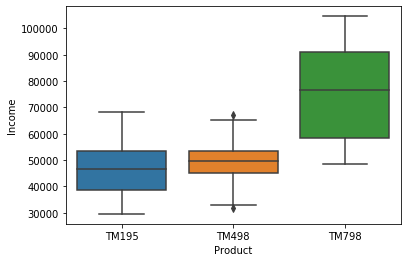

In [8]:
sns.boxplot(data = df, y = 'Income', x = 'Product')

In [9]:
male = df[df['Gender']=='Male']
male['Product'].value_counts()

TM195    40
TM798    33
TM498    31
Name: Product, dtype: int64

In [10]:
female = df[df['Gender']=='Female']
female['Product'].value_counts()

TM195    40
TM498    29
TM798     7
Name: Product, dtype: int64

In [11]:
male['Income'].mean()

56562.75961538462

In [12]:
female['Income'].mean()

49828.90789473684

In [13]:
male[male['Product']=='TM798']['Income'].describe()

count        33.000000
mean      75825.030303
std       18675.002521
min       48556.000000
25%       58516.000000
50%       77191.000000
75%       90886.000000
max      104581.000000
Name: Income, dtype: float64

In [14]:
df[df['MaritalStatus']=='Single'].mean()

C:\Users\Ollie\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age             27.178082
Education       15.438356
Usage            3.465753
Fitness          3.369863
Income       50724.424658
Miles          101.589041
dtype: float64

In [15]:
df[df['MaritalStatus']=='Single']['Product'].value_counts()

TM195    32
TM498    24
TM798    17
Name: Product, dtype: int64

In [16]:
df[df['MaritalStatus']=='Partnered']['Product'].value_counts()

TM195    48
TM498    36
TM798    23
Name: Product, dtype: int64

In [17]:
df[df['MaritalStatus']=='Single'].mean()

C:\Users\Ollie\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age             27.178082
Education       15.438356
Usage            3.465753
Fitness          3.369863
Income       50724.424658
Miles          101.589041
dtype: float64

In [18]:
df[df['MaritalStatus']=='Partnered'].mean()

C:\Users\Ollie\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age             29.887850
Education       15.663551
Usage            3.448598
Fitness          3.271028
Income       55763.000000
Miles          104.289720
dtype: float64

In [19]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [20]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [21]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

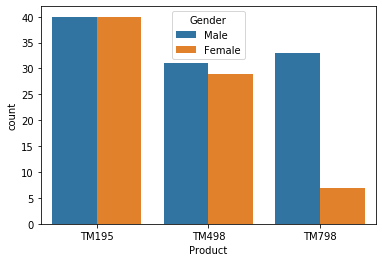

In [22]:
sns.countplot(x='Product', hue='Gender', data=df)

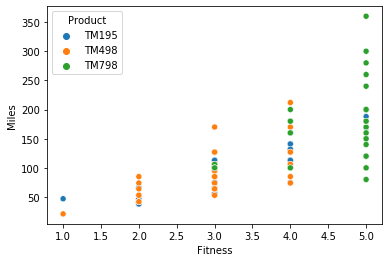

In [23]:
sns.scatterplot(x='Fitness', y='Miles', hue='Product', data=df)

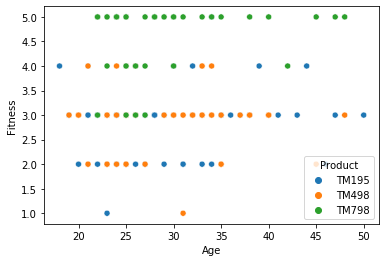

In [24]:
sns.scatterplot(x='Age', y='Fitness', hue='Product', data=df)

In [25]:
correlation_matrix = df.corr()

In [26]:
correlation_matrix

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


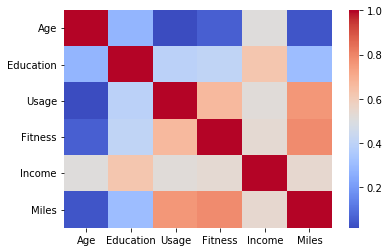

In [27]:
sns.heatmap(data = correlation_matrix, cmap = 'coolwarm')

<Figure size 720x432 with 0 Axes>

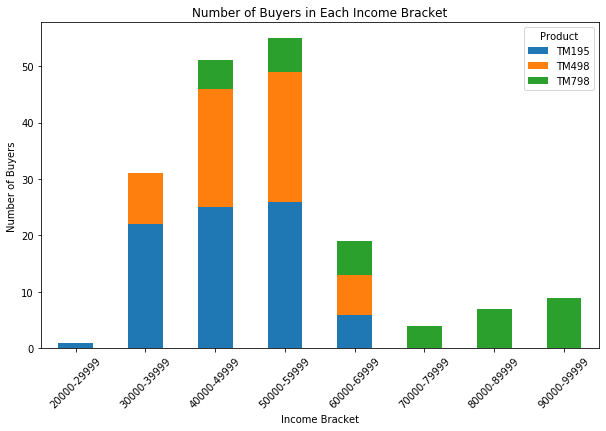

In [28]:
# Extension of Lorin's graph just with the added Hue on product
import matplotlib.pyplot as plt
bins = range(0, 100001, 10000)
labels = [f'{i}-{i+9999}' for i in bins[:-1]]

df['income_bracket'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)

income_bracket_counts = df['income_bracket'].value_counts().sort_index()
income_product_crosstab = pd.crosstab(df['income_bracket'], df['Product'])
plt.figure(figsize=(10, 6))
income_product_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Income Bracket')
plt.ylabel('Number of Buyers')
plt.title('Number of Buyers in Each Income Bracket')
plt.xticks(rotation=45)
plt.show()

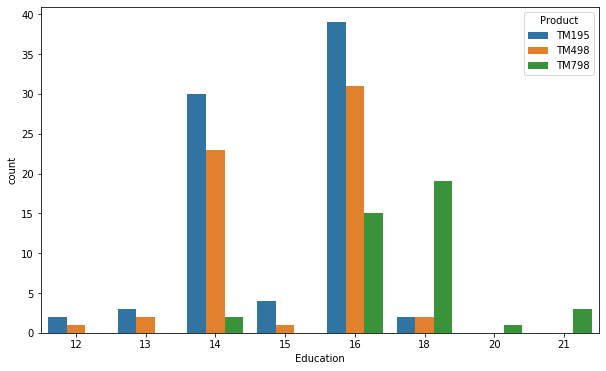

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Product', data=df)

In [30]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

categorical_features = ['Gender', 'MaritalStatus']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df

,Product,Age,Education,Usage,Fitness,Income,Miles,income_bracket,Gender_Male,MaritalStatus_Single
0,TM195,18,14,3,4,29562,112,20000-29999,1,1
1,TM195,19,15,2,3,31836,75,30000-39999,1,1
2,TM195,19,14,4,3,30699,66,30000-39999,0,0
3,TM195,19,12,3,3,32973,85,30000-39999,1,1
4,TM195,20,13,4,2,35247,47,30000-39999,1,0
...,...,...,...,...,...,...,...,...,...,...
175,TM798,40,21,6,5,83416,200,80000-89999,1,1
176,TM798,42,18,5,4,89641,200,80000-89999,1,1
177,TM798,45,16,5,5,90886,160,90000-99999,1,1
178,TM798,47,18,4,5,104581,120,NaN,1,0


In [31]:
df = df.drop('income_bracket', axis = 1)


In [32]:
df


,Product,Age,Education,Usage,Fitness,Income,Miles,Gender_Male,MaritalStatus_Single
0,TM195,18,14,3,4,29562,112,1,1
1,TM195,19,15,2,3,31836,75,1,1
2,TM195,19,14,4,3,30699,66,0,0
3,TM195,19,12,3,3,32973,85,1,1
4,TM195,20,13,4,2,35247,47,1,0
...,...,...,...,...,...,...,...,...,...
175,TM798,40,21,6,5,83416,200,1,1
176,TM798,42,18,5,4,89641,200,1,1
177,TM798,45,16,5,5,90886,160,1,1
178,TM798,47,18,4,5,104581,120,1,0


In [33]:
df['Product'] = df['Product'].astype('category')

In [34]:
X = df.drop('Product', axis=1)
y = df['Product']

In [35]:
model = sm.MNLogit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.537120
         Iterations 12


In [36]:
print(result.summary())

                          MNLogit Regression Results                          
Dep. Variable:                Product   No. Observations:                  180
Model:                        MNLogit   Df Residuals:                      164
Method:                           MLE   Df Model:                           14
Date:                Mon, 05 Aug 2024   Pseudo R-squ.:                  0.4937
Time:                        13:03:12   Log-Likelihood:                -96.682
converged:                       True   LL-Null:                       -190.95
Covariance Type:            nonrobust   LLR p-value:                 1.189e-32
       Product=TM498       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Age                     -0.0420      0.041     -1.016      0.309      -0.123       0.039
Education               -0.0283      0.099     -0.285      0.776      -0.223       0.166
Usage       

In [37]:
params = result.params
params.columns = ['TM498','TM798']
params

,TM498,TM798
Age,-0.042037,-1.675156
Education,-0.028281,-1.742243
Usage,-0.421632,1.634640
Fitness,-0.869941,2.652998
Income,0.000062,0.000917
Miles,0.025997,0.035327
Gender_Male,0.039558,1.380604
MaritalStatus_Single,0.021532,0.873116


In [38]:
odds_ratios = np.exp(params)
odds_ratios

,TM498,TM798
Age,0.958835,0.187279
Education,0.972115,0.175127
Usage,0.655976,5.127611
Fitness,0.418976,14.196543
Income,1.000062,1.000918
Miles,1.026338,1.035958
Gender_Male,1.040351,3.977304
MaritalStatus_Single,1.021765,2.394360


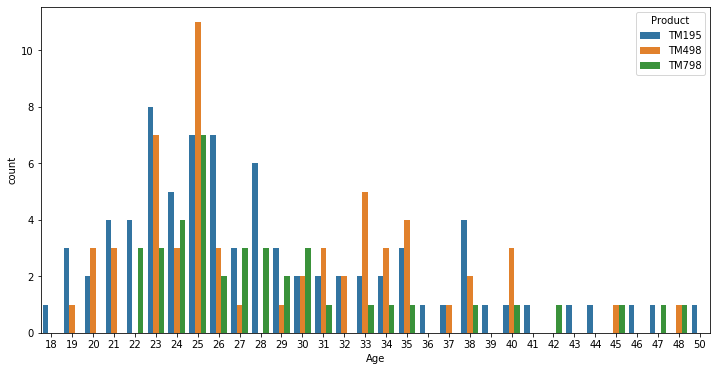

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(data = df, x = 'Age', hue='Product' )

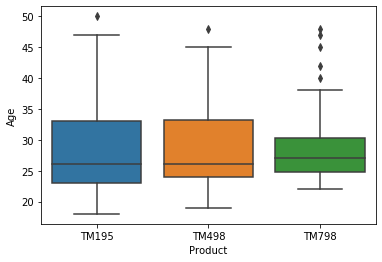

In [44]:
sns.boxplot(data = df, y = 'Age', x = 'Product')

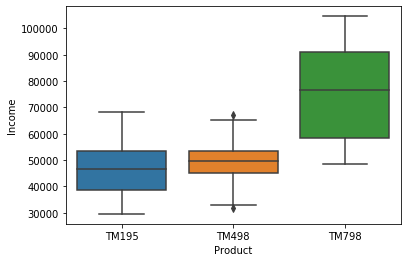

In [47]:
sns.boxplot(data = df, y = 'Income', x = 'Product')

In [ ]:
sns.pairplot()